# 実践演習概要
- 各演習問題の内容に従い、データ読み取り、加工、DBへ出力を行ってください  
- 出来たテーブルに対し、データ型の変換まで実施してください  
  その際、A5mk2（SQL）を利用して下さい  
- DB上には途中テーブルを作成せず、最終テーブルのみを作成して下さい  
- 習っていない関数が必要になる場合がありますので、Webで検索してください

**input**　：使用する元データ  
**output** ：作成したデータの出力先【DE教育受講生向け】  
**answer** ：最終形確認用  

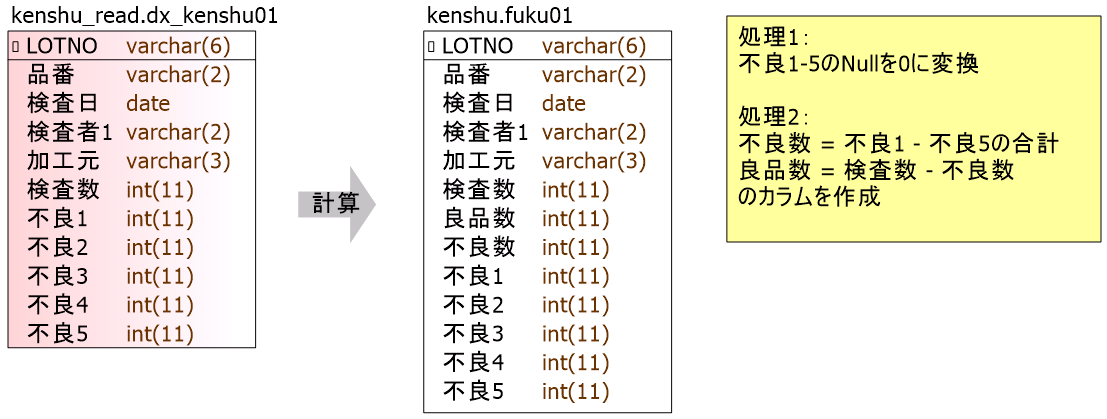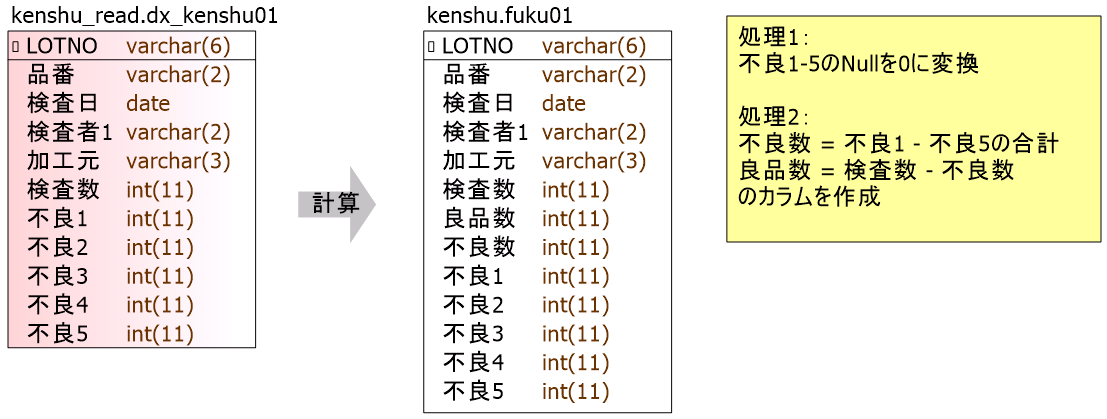## 演習01
（概要）  
DBに登録されている部品の検査データを加工して、DBへoutputする  

（処理）  
処理1：  
　・（接続先）のinputから、dx_kenshu01をDataFrameに読み込む  
　・「不良1」～「不良5」のNullを0に置き換える  
 　　※DataFrame全体を置き換えてOKです。暇な人は不良1～5を範囲指定して置き換えてもOK  
<br>
処理2：  
　・「不良数」カラムを作成  
　　不良数 ＝ 不良1～不良5の合計  
　・「良品数」カラムを作成  
　　良品数 ＝ 検査数ー不良数  
　・ER図に合わせて、DataFrameのカラム順を入れ替える  
  　　※暇な人はそういう関数を使って、最初から入れる場所を決めてもOK  
<br>
処理3【DE教育の方】：  
　・作成したDataFrameを（接続先）outputに書き込む  
　　※テーブル名は、自分の名前を付けてください。そうでないと他人のテーブルと被ります  
　・作成したDBのカラムの型設定、Primary Keyの設定を行う  
　　※Primary KeyはLOTNOです  
<br>
処理3【専門技術研修 Python実践の方】：  
　・作成したDataFrameをcsvに書き込む  
　・作成したDataFrameをExcelに書き込む  
    ※作成したファイル・保存場所は、好きなものを指定してください。  
  
<br>  

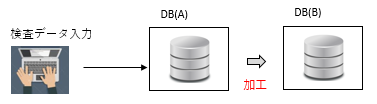

（処理内容）  
<!-- 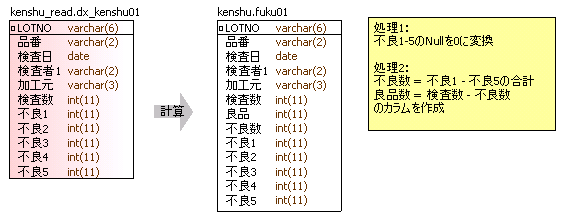   -->
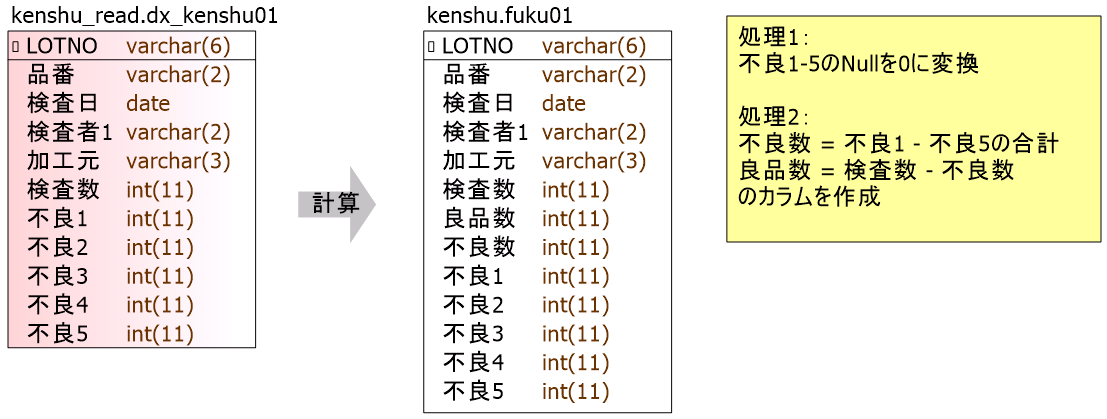  

（接続先）  
**input**　　IP：10.110.55.59　schema：kenshu_read　table：dx_kenshu01  
**output**　 IP：10.110.55.59　schema：kenshu　　　 table：任意  
**answer**　 IP：10.110.55.59　schema：kenshu_read　table：answer01  


## 演習02
（概要）  
・検査データの収集  
・部品がケースに入って流れてくるのを、検査装置が自動で読み取り、データをcsvに保存していく  
・データはLOTNOごとに、csvの形式でNASに払い出されている  
・複数のcsvを読み取って加工し、MotionBoardで読みやすいように縦持ち変換し、DBに保存する  

【注意】  
・csvの測定結果は部品ごとの番号が存在せず測定値が順に並んでいるだけなので、自分でID的なものを設定する必要がある  
・csvのファイル名がLOTNOである  

（処理内容）  
処理１：  
　★手順としては、いきなりFor文に入れずに、下記の内容に従い、まずファイル一つだけ読み込んで加工する  
　・Pathlibを使い、input先のNASサーバに入っているファイルのパスをリストに取り込む  
　・作ったリストの0番目を、pd.read_csv関数の第一引数に指定してDataFrameとして読み込む  
  
処理２：  
　・読み込んだDataFrameから、PAL_1, PAL_2, PAL_3のカラムだけ抽出してER図とカラム順を合わせる（実践演習01でやりました）  
 　　※他のカラム（c1, c2, c3…）は今回いらないので、落としてOK  
　・「LOTNO」カラムを追加  
　　LOTNO＝csvファイルの名前（Pathlibの関数で取れます)  
　・「UDATE」カラムを追加  
　　UDATE＝ファイル更新時間（Pathlibのテキストに書いてあります）  
　・「SNO」カラムを追加  
　　SNO＝csvに含まれる全測定データの通しNo。上から順番にナンバリングする。indexの番号を利用したら付けられます。  

処理３：  
　・完成したDataFrameを縦持ちにする  
　　→DFを`melt`する  
　・`melt`の引数には、LOTNO, SNO, UDATEを`id_vars`、"測定項目"を`var_name`, "測定値"を`value_name`に設定する  

処理４：  
　・処理３で作ったDFを、一度output先のDBに出力する    
　・A5Mk2で作ったテーブルの型、プライマリーキー設定をする  
　　**※注意：ER図で赤字のカラムをプライマリーキーに設定してください**  
　※プライマリーキーはLOTNO、SNO、測定項目です  

処理５：  
　・Pathlibのテキストをマネして、処理1で作ったリストをfor文で回して読み込む  
　・For文の中身に、処理１～３で作ったDFの加工を追加  
　・For文の最後に、DBへアップデートするコードを追加する（Pandasでappendする）  

<!-- 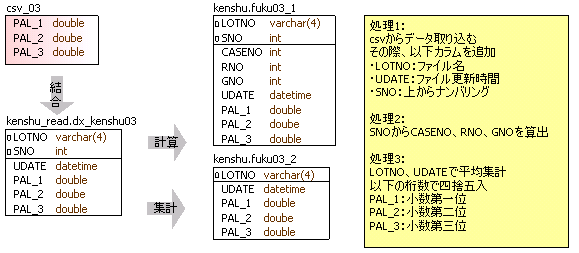   -->
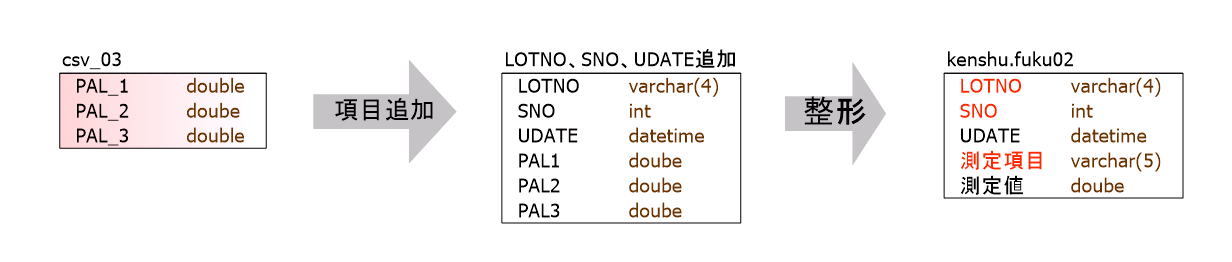   

**※上記ER図は、doubleの綴りが間違っているので注意してください。A5Mk2で水色にならないので気づくと思いますが…**  


（接続先）  
**input**　　NAS IP：\\\\10.110.0.44\everyone\03　file：csvファイル  
**output**　 IP：10.110.55.59　schema：kenshu　　　 table：任意  
**answer**　 IP：10.110.55.59　schema：kenshu_read　table：dx_answer06  



## 実践03
（概要）  
部品の劣化指数が定期的に更新される  
更新情報がExcelで出力され、特定のフォルダに保存されるので、1か月おきに自動で最新情報を更新する  
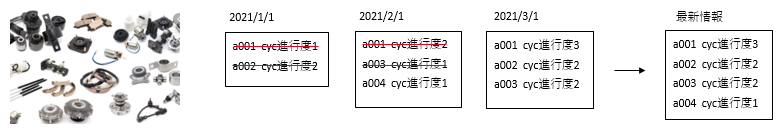  

（処理内容）  
- 次回別の更新データが来た場合でも、正しく処理が回るようジョブを作る事  
  ➀ファイルを更新時間が古い順に読み取る  
  ➁DBへoutputする際、挿入して更新する処理（upsert_update）を入れる  
- 取り込んだファイルは取り込み済みのフォルダへ移動する事  

処理１：  
　★手順としては、いきなりFor文に入れずに、まずファイル一つだけ読み込んで加工する方法を検討する    
　・Pathlibを使い、input先のNASサーバに入っているファイルのパスをリストに取り込む  
　・作ったリストの0番目を、pd.read_excel関数の第一引数に指定してDataFrameとして読み込む  

処理２：  
　★読み込んだExcelファイルは1行目と1列目が空白になっているので、整形する  
　・read_excelのとき、引数指定して1行目を飛ばして読み込む（と、カラム名が正しく設定される）  
　・読み込んだDataFrameから、必要なカラムだけ抽出してER図とカラム順を合わせる（実践演習01でやりました）  

処理３：  
　・作ったDFを、一度output先のDBに出力する（この段階ではto_sqlで入れてよい）  
　・A5Mk2で作ったテーブルの型、プライマリーキー設定をする  
　※プライマリーキーはPARTSです  

処理４：  
　・Pathlibのテキストをマネして、処理1で作ったリストをfilesに入れる  
　・For文の中身に、処理１と処理２で作ったDFの加工を入れる  

処理５：  
　・SQL操作のテキストをマネして、処理４の後にupsert updateする処理を追加して書く  
　※For文の中なので、インデントに気を付ける  
　・最後に、読み終わったファイルを「取り込み後」フォルダに動かすコードを書く  
　・For文の前にengine.connect()、For分を抜けた後にengine.connect().close()を忘れずに

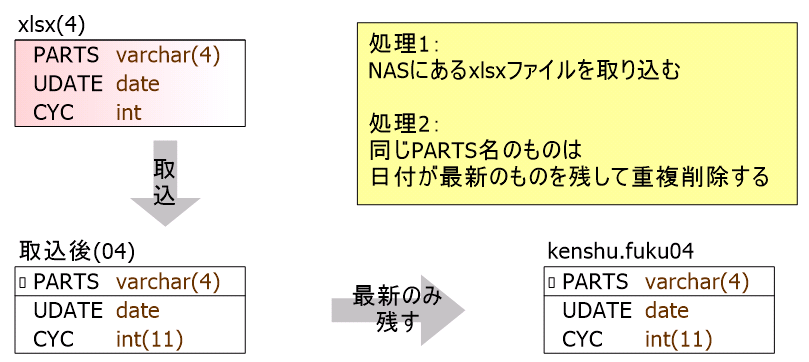  

<!-- 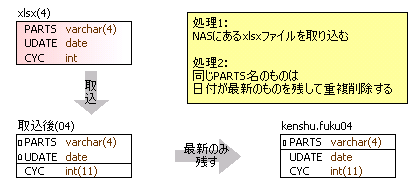   -->

<!-- 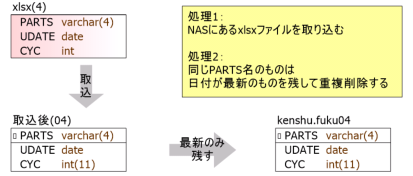   -->

（接続先）  
**input**　　NAS IP：\\\\10.110.0.44　folder：everyone\\04　file：xlsxファイル  
　　　　　※ファイル移動の処理を入れるため、自身のデスクトップ上にフォルダをコピーしておく事  
         **※Pythonで参照するファイル・フォルダは、自分のローカルPCを参照するようにしてください**  
**output**　 IP：10.110.55.59　schema：kenshu　　　 table：任意  
**answer**　 IP：10.110.55.59　schema：kenshu_read　table：answer04

## 実践04
（概要）  
部材の購入リストがある  
各部材の費用は様々な為替レートで登録されているため、  
為替レートのマスタを紐付けて日本円の金額を算出する  

（処理内容）  
処理1：  
　・dx_kenshu05_1を取り込み、縦持ちに変換する  
　・縦持ち後のカラム名は、RATEとRATE_VALUEにすること（ER図を参照）  

処理2：  
　・dx_kenshu05_2を取り込む  
　・処理1で縦持ちにした後のDFとマージする（キーはMONTH、RATE）  
　・文脈から、左側がdx_kenshu05_2（部材リスト）である

処理3：  
　・結合したDFに、PRICE_JPYのカラムを作る  
　・PRICE_JPY＝RATE_VALUE * PRICE  
　・PRICE_JPYは整数で四捨五入する  

処理4【DE教育の方】：  
　・作成したDataFrameを（接続先）outputに書き込む  
　・作成したDBのカラムの型設定、Primary Keyの設定を行う  
　　※Primary KeyはPARTS, MONTHです  

処理4【専門技術研修 Python実践の方】：  
　・作成したDataFrameをcsvに書き込む  
　・作成したDataFrameをExcelに書き込む  
    ※作成したファイル・保存場所は、好きなものを指定してください。  
  
<br>  

（接続先）  
**input**　　IP：10.110.55.59　schema：kenshu_read　table：dx_kenshu05_1, dx_kenshu05_2  
**output**　 IP：10.110.55.59　schema：kenshu　　　 table：任意  
**answer**　 IP：10.110.55.59　schema：kenshu_read　table：dx_answer05  

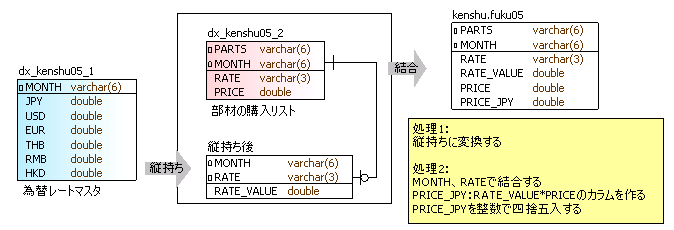

## 実践05

（概要）  
・測定値の入ったcsvファイルと、製品Novs.製品名のマスターcsvがある  
・MBで表示できるように、測定値を縦持ちにして製品名マスターと結合し、測定データの横にSEIHIN、BANGOの項目を表示したい  

（処理内容）※わかりやすいように変数名をあらかじめ指定していますが、他の名前を付けても良いです。  
処理1：  
　・測定ファイルのパス読み込み（「2021年」フォルダの下）、リストに格納  
　・読み込んだリストの0番目を変数fileに入れ、read_csvで変数dfに格納  

処理2：  
　・測定値を縦持ちにする  
　　（何をid_versにするとかは考えてください）  
　　（縦持ち後の項目名は「測定項目」「測定値」にしてください）  

処理3：  
　・マスターcsvファイルを読み込み、変数df_mstに格納する  
　・処理2で縦持ちにしたDFの「製品名」に、df_mstの「SEIHIN」をマージする  

処理4：  
　・処理3で作成したDFをoutput先のDBに入れる  
　・テーブルの整形をする（A5Mk2でSQL文を書き、型やプライマリーキーの設定をER図に基づいて行う）  

処理5：  
　・Pathlibのテキストをマネして、処理1で作ったfilesのリストをfor文で回して読み込む  
　・For文の中身に、処理2と処理3で作ったDFの加工を入れる  

処理6：  
　・SQL操作のテキストを参考に、処理5の後でappendする処理を追加して書く  
　※For文の中なので、インデントに気を付ける  
 
（接続先）  
**input**　　NAS IP：\\10.110.0.44\everyone\03　file: 測定値→「2021年」フォルダの下、マスター→05フォルダの直下「SEIHIN_MASTER.csv」  
**output**　 IP：10.110.55.59　schema：kenshu　　　 table：任意  
**answer**　 IP：10.110.55.59　schema：kenshu_read　table：answer_test05  

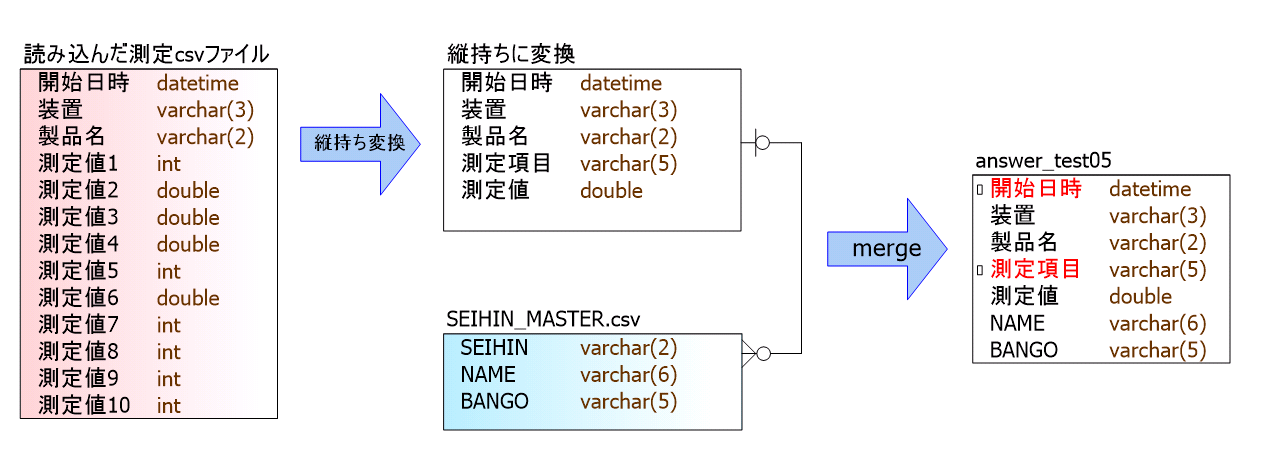   

<!-- 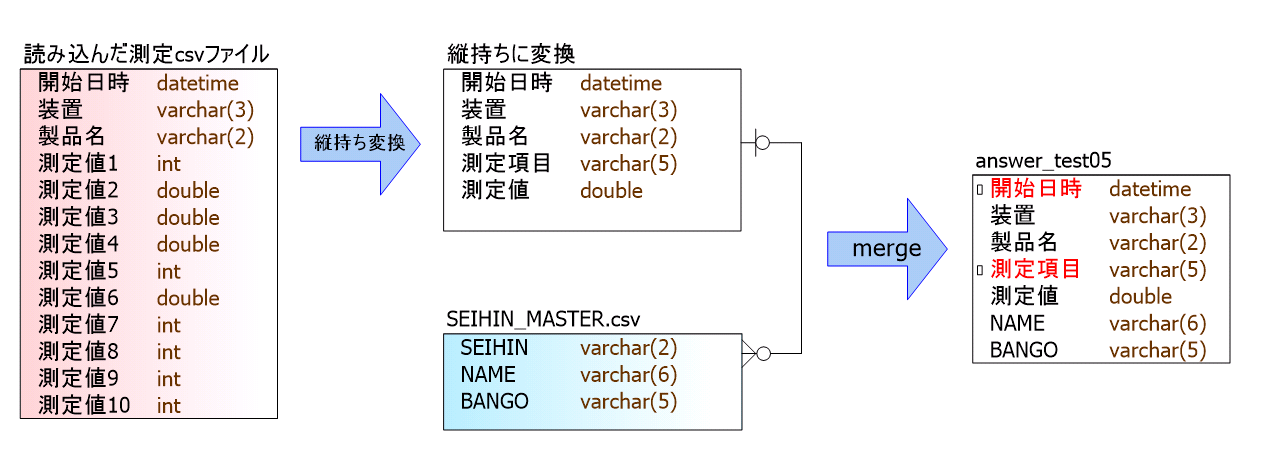 -->

## 実践06
（概要）  
・検査結果が出力されるcsvファイルと、納入先マスタが記載されたExcelが保存されているinputフォルダがある  
・このファイルからcsvファイルを読み込み、マスタExcelと紐付けしたい  
・紐付け後のDataFrameを、DBに書き込みたい  

（処理）  
処理1：  
　・「yyMM_検査結果.csv」の3つのcsvファイルをPythonに読み込む  
　・Nullを0に置き換える  
　・「不良数」カラムを作成し、不良数＝不良1＋不良2＋不良3 で算出する  
　・3つのcsvから作ったDataFrameを、縦方向に結合する  
　・LOTNOで昇順に並べる  
　　※昇順＝a001→a002…の順  

処理2：  
　・「Destination_master」ExcelファイルをPythonに読み込む  
　・そのまま読み込むとカラムや行がずれるので、DataFrameとして問題なく使える形になるように調整する  
　・「備考」カラムを落とす  

処理3：  
　・処理1で作成したDataFrameのD_CODEと、処理2で作成したDataFrameのD_CODEをマージする  

処理4：  
　・処理3で結合したDataFrameをDBに作成する（テーブル名は自分の名前に変更すること）  
　・作成したDBのカラムの型変換、Primary Keyの設定を行う  
　　※Primary KeyはLOT NOです。  
　　※カラムの型はER図にしたがってください。カラムの順番に注意してください。  

（接続先）  
**input**　　NAS IP：\\10.110.0.44　folder：everyone\test_01　file：csvファイル（３つ）、Excelファイル（1つ）  
**output**　 IP：10.110.55.59　schema：kenshu　　　 table：任意  
**answer**　 IP：10.110.55.59　schema：kenshu_read　table：answer_test01  

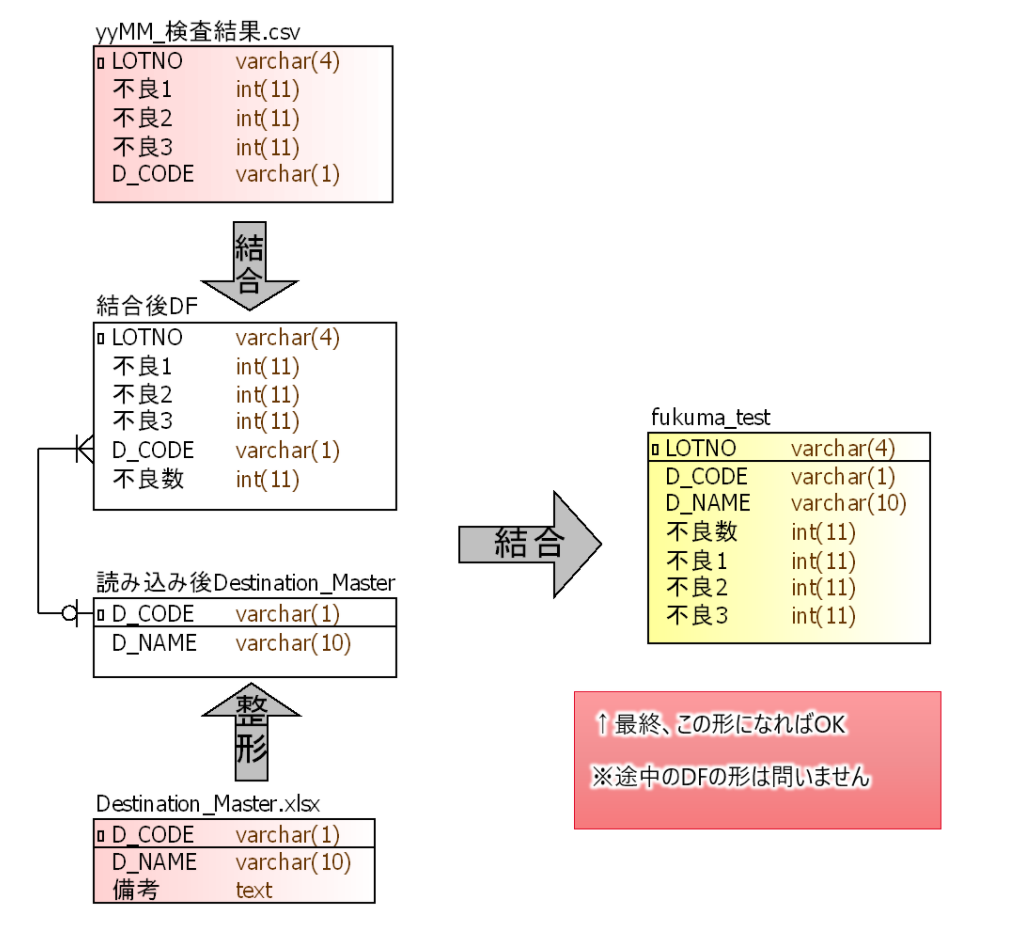 

## 実践07
（概要）  
・実践06で作成したテーブルが横持ちなので、MotionBoardで表示できない。  
　→実践06で作成したテーブルを、縦持ちに変換して新しいテーブルを作りたい。  

（処理）  
処理1：  
　・実践06で作成したテーブル（kenshu_read.answer_test01）を読み込む  
　・「不良数」カラムを削除する  
　・読み込んだテーブルの不良項目部分を縦持ちに変換する  
 　※melt後の項目名は「不良項目」「不良数」とすること
 
処理2：  
　・処理1で作成したDataFrameをDBに書き込む（テーブルは新しく作り、自分の名前に変更すること）  
　・作成したDBのカラムの型変換、Primary Keyの設定を行う  
 　※Primary KeyはLOT NO、不良項目です

（接続先）  
**input**　　IP：10.110.55.59　schema：kenshu_read　table：answer_test01   
**output**　 IP：10.110.55.59　schema：kenshu　　　 table：任意  
**answer**　 IP：10.110.55.59　schema：kenshu_read　table：answer_test02  

## 実践08
（概要）  
・今後、検査csvが増えていったときに、実践06と07で作成したテーブルを自動で更新したい。  
　→実践06と07でで作成したテーブルの定期実行用のコードを作成する。  

（処理）  
処理1：  
　・実践06, 07で作成したコードから、下記inputに保存されているcsvを自動で読み込んで定期実行するためのコードを作成する  
　　※inputに保存しているデータをSQL文でupsert updateするようなコードを作成する  

処理2：  
　・処理1で作成したコードを実行し、output先のテーブルにデータが追加されていることを確かめる

（接続先）  
**input**　　NAS IP：\10.110.0.44　folder：everyone\test_02　file：csvファイル（３つ）   
**output**　 IP：10.110.55.59　schema：kenshu　　　 table：実践06, 07で自分が作ったテーブル２つ  
**answer**　 IP：10.110.55.59　schema：kenshu_read　table：answer_test03, answer_test04  

# 【以下、おまけ】過去の演習問題
※やりたい方は自習でやってみてください。算数的な思考能力が試されます。

## 過去の演習02
（概要）  
・物流業務をイメージ  
・CASEID＝各LOTを出荷先ごとに一纏めにしたID  
・各CASE毎に出荷便が決まっている  
　↓  
各CASEに含まれる全LOT数と出荷済のLOT数を集計して、今日の出荷がどのくらい残っているのかを把握したい  

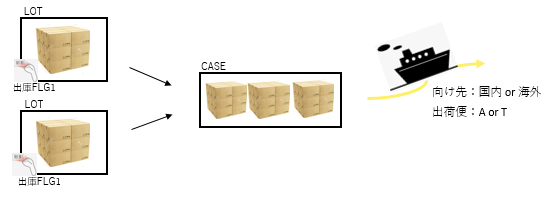  
・dx_kenshu02_1:「その日に出荷しないといけない全Lot/CASEIDの一覧」  
・dx_kenshu02_2:「その日に出荷したLot/CASEIDの一覧」  
・dx_kenshu02_3:「拠点とCASEIDから国内向け・海外向けか、出荷便は何かが書いてあるマスタ」  

（処理内容）  
処理1：  
　・dx_kenshu02_1をdf1、dx_kenshu02_2をdf2、dx_kenshu02_3をdf3としてpd.read_sqlでPythonに読み込む  
　・df1に「全LOT数」というカラムを作り、すべての要素を1にする  
　・df2に「出荷LOT数」というカラムを作り、すべての要素を1にする  

処理2：  
　・df1とdf2を、「拠点、LOTNO、CASEID」で結合する（df4）  
　　→下記ER図の「結合後」のようなDFができる  
 
処理3：  
　・df4を「拠点、CASEID」で集計（groupby）する  
　　※全LOT数、出荷LOT数は合計値を出す  
　　→ER図の「集計後」のようなDFができる  
 
処理4：    
　・df3とdf4を「拠点、CASEID」でマージする  
 
処理5：  
　・作成したDataFrameを（接続先）outputに書き込む  
　・作成したDBのカラムの型設定、Primary Keyの設定を行う  
　　※Primary keyは「拠点、CASEID」です
<!-- 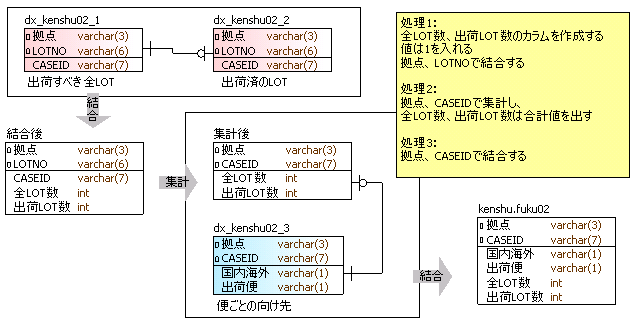   -->
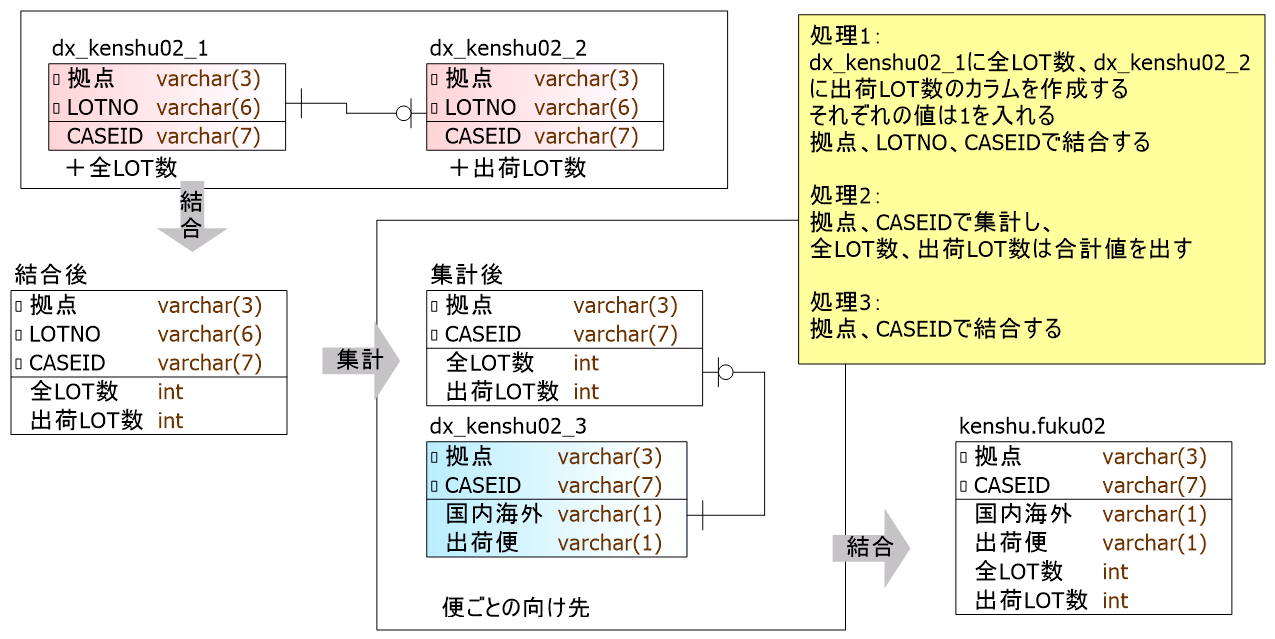   

**※注意※**
- 「全LOT数」はdx_kenshu02_1に追加  
- 「出荷LOT数」はdx_kenshu02_2に追加  

（接続先）  
**input**　　IP：10.110.55.59　schema：kenshu_read　table：dx_kenshu02_1, dx_kenshu02_2, dx_kenshu02_3  
**output**　 IP：10.110.55.59　schema：kenshu　　　 table：任意  
**answer**　 IP：10.110.55.59　schema：kenshu_read　table：answer02  


## 過去の演習03
（概要）  
・検査データの収集  
・部品がケースに入って流れてくるのを、検査装置が自動で読み取り、データをcsvに保存していく  
・データはLOTNOごとに、csvの形式でNASに払い出されている  
・csvを読み取って加工し、DBにoutputする  

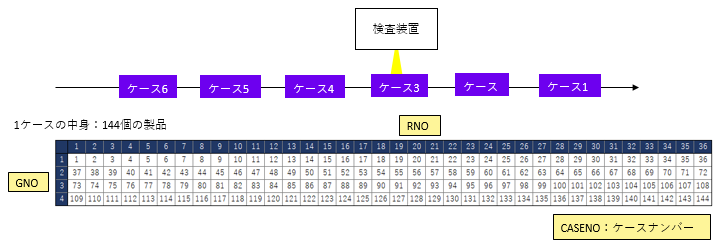  

・一つのLOTNOには、複数のケースが含まれる  
・1ケース当たり144個の部品が含まれる  
・部品はケース内で横36列×縦4行に並んでいる  
・横の位置＝RNO（1～36の数字）、縦の位置＝GNO（1～4の数字）である  
・csvの測定結果は部品ごとの番号が存在せず測定値が順に並んでいるだけなので、自分でID的なものを設定する必要がある  

・データは下記の測定順序で、上から順にcsvへ書き込まれる  
　1CASE目　上図1-144を順番に測定  
　2CASE目　上図1-144を順番に測定  
…  

（処理内容）  
処理１：  
　★手順としては、いきなりFor文に入れずに、まずファイル一つだけ読み込んで加工する方法を検討する  
　・Pathlibを使い、input先のNASサーバに入っているファイルのパスをリストに取り込む  
　・作ったリストの0番目を、pd.read_csv関数の第一引数に指定してDataFrameとして読み込む  
  
処理２：  
　・読み込んだDataFrameから、PAL_1, PAL_2, PAL_3のカラムだけ抽出してER図とカラム順を合わせる（実践演習01でやりました）  
　・「LOTNO」カラムを追加  
　　LOTNO＝csvファイルの名前（Pathlibの関数で取れます)  
　・「UPDATE」カラムを追加  
　　UPDATE＝ファイル更新時間（Pathlibのテキストに書いてあります）  
　・「SNO」カラムを追加  
　　SNO＝csvに含まれる全測定データの通しNo。上から順番にナンバリングする。indexの番号を利用したら付けられます。  

処理３：  
　・処理２で作ったSNOから、下記のカラムを追加する。算出方法は頑張って考える。Excelで数式を書いて考えたらいいかも。  
　・CASEID　：ケースのID。SNOが144個ごとに次のIDになる  
　・RNO　：そのケースの部品の横位置（1～36の番号）  
　・GNO　：そのケースの部品の縦位置（1～4の番号）  
　・作ったDFのカラムをER図に合わせて並べ替える  

処理４：  
　・処理３で作ったDFを、一度output先のDBに出力する    
　・A5Mk2で作ったテーブルの型、プライマリーキー設定をする  
　※プライマリーキーはLOTNO、SNOです  

処理５：  
　・Pathlibのテキストをマネして、処理1で作ったリストをfor文で回して読み込む  
　・For文の中身に、処理１～２で作ったDFの加工、DBへアップデートするコードを追加する  

処理６：  
　・処理３で作ったDFを、「LOTNO、UDATE」で集計して平均を出す  
　・それぞれの項目を以下の桁数で四捨五入する  
　　PAL_1：　小数第一位  
　　PAL_2：　小数第二位  
　　PAL_3：　小数第三位  
  
処理７：  
　・処理６で作ったDFを、output先のDBに出力する（処理４のテーブルとは違う名前を付けること）  
<!-- 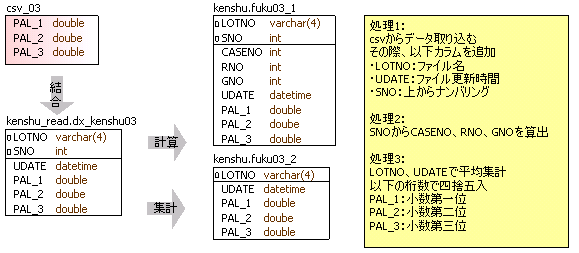   -->
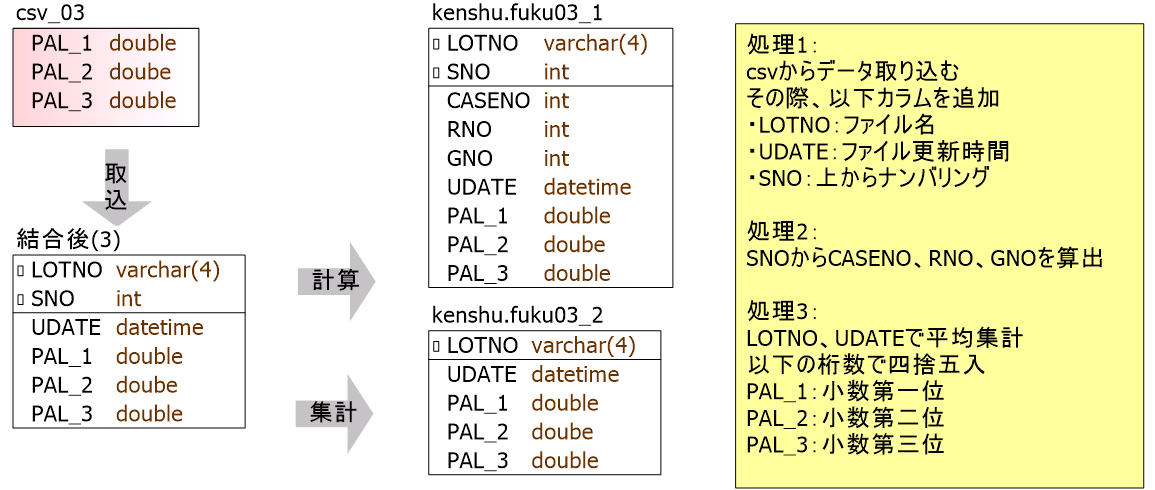   

（接続先）  
**input**　　NAS IP：\\\\10.110.0.44　folder：everyone\\03　file：csvファイル  
**output**　 IP：10.110.55.59　schema：kenshu　　　 table：任意  
**answer**　 IP：10.110.55.59　schema：kenshu_read　table：dx_answer03  

